# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

## Branton Dawson [Web Scraping](https://github.com/bjdawson23/620-mod6-web-scraping)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [1]:
# Create and activate a Python virtual environment. 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    import subprocess
    subprocess.run(["python", "-m", "spacy", "download", "en_core_web_sm"])
    nlp = spacy.load("en_core_web_sm")
import os

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.9.0
argon2-cffi               25.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
blis                      1.3.0
catalogue                 2.0.10
certifi                   2025.7.14
cffi                      1.17.1
charset-normalizer        3.4.2
click                     8.2.1
cloudpathlib              0.21.1
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.2
cycler                    0.12.1
cymem                     2.0.11
debugpy                   1.8.15
decorator                 5.2.1
defusedxml                0.7.1
en_core_web_sm            3.8.0
executing     

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [2]:
article_page = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
article_html = article_page.text

# pickle works similar to json, but stores information in a binary format
# json files are readable by humans, pickle files, not so much

# BeautifulSoup objects don't pickle well, so it's appropriate and polite to web developers to cache the text of the web page, or just dump it to an html file you can read in later as a regular file
import pickle
with open('article.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)
    
with open('article.pkl', 'rb') as f:
    article_html = pickle.load(f)
# Now we can use BeautifulSoup to parse the HTML
soup = BeautifulSoup(article_html, 'html.parser')
# We can use the soup object to find the title of the article
article_title = soup.find('h1', class_='entry-title').text
print(f'Article title: {article_title}')

Article title: How Laser Headlights Work


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [3]:
# Read in the article text and use .get_text() to get the text of the article
print('Article text:')
# We can use the soup object to find the text of the article
article_text = soup.find('div', class_='entry-content').get_text()
# format text to print nicely
article_text = article_text.replace('\n', ' ').replace('\r', '').strip()
# format text to print in paragraphs
article_text = '\n\n'.join(article_text.split('. '))
# We can print the first 5000 characters of the article text to verify we have it
print(article_text[:5000])  # Print the first 500 characters of the article text


Article text:
When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind

Engines, fuel efficiency, and the switch to electric power are all more front of mind

However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out

Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs

Now, a new technology is on the scene, with lasers!  Laser Headlights?! BWM’s prototype laser headlight assemblies undergoing testing

The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile

Obviously, coherent beams of monochromatic light would make for poor illumination outside of a very specific spot quite some distance away

Thankfully for our eyes, laser headlights don’t w

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

Most common tokens:
Token: laser, Count: 30
Token: headlights, Count: 17
Token: technology, Count: 10
Token: headlight, Count: 10
Token: led, Count: 10


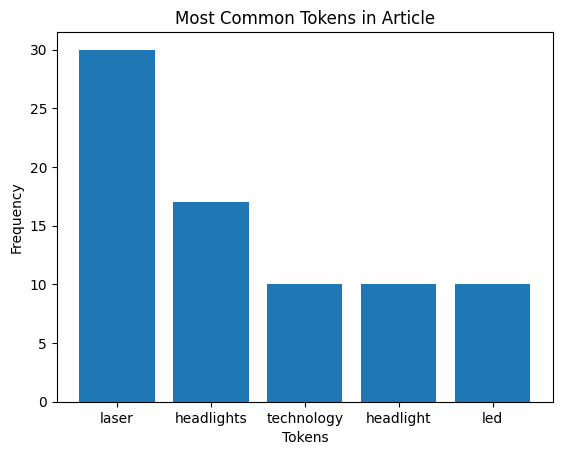

In [4]:
# Determine the 5 most frequent tokens (converted to lower case). Print the common tokens with an appropriate label and frequencies.
nlp = spacy.load('en_core_web_sm')
doc = nlp(article_text)
# Get the tokens, convert to lower case, and filter out stop words and punctuation
tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
# Count the frequency of each token
token_counts = Counter(tokens)
# Get the 5 most common tokens
most_common_tokens = token_counts.most_common(5)
print('Most common tokens:')
for token, count in most_common_tokens:
    print(f'Token: {token}, Count: {count}')
# Plot the frequencies of the 5 most common tokens
plt.bar([token[0] for token in most_common_tokens], [token[1] for token in most_common_tokens])
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Most Common Tokens in Article')
plt.show()
# Save the article text to a file
with open('article.txt', 'w') as f:
    f.write(article_text)


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

Most common lemmas:
Lemma: laser, Count: 35
Lemma: headlight, Count: 26
Lemma: beam, Count: 12
Lemma: technology, Count: 10
Lemma: led, Count: 10


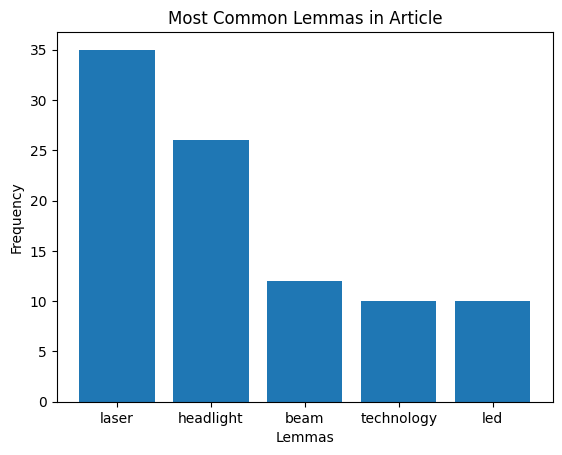

In [5]:
# determine the 5 most frequent lemmas (converted to lower case) and print the common lemmas with an appropriate label amd frequencies.
doc = nlp(article_text)
# Get the lemmas, convert to lower case, and filter out stop words and punctuation
lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
# Count the frequency of each lemma
lemma_counts = Counter(lemmas)
# Get the 5 most common lemmas
most_common_lemmas = lemma_counts.most_common(5)
print('Most common lemmas:')
for lemma, count in most_common_lemmas:
    print(f'Lemma: {lemma}, Count: {count}')
# Plot the frequencies of the 5 most common lemmas
plt.bar([lemma[0] for lemma in most_common_lemmas], [lemma[1] for lemma in most_common_lemmas])
plt.xlabel('Lemmas')
plt.ylabel('Frequency')
plt.title('Most Common Lemmas in Article')
plt.show()
# Save the article text to a file
with open('article.txt', 'w') as f:
    f.write(article_text)


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [6]:
# List interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
# Load a language model
nlp = spacy.load("en_core_web_sm")

def score_sentence_by_token(sentence, interesting_tokens):
    """
    Calculates the ratio of interesting tokens in a sentence based on exact word matches.
    """
    doc = nlp(sentence)
    total_tokens = len(doc)
    count = sum(1 for token in doc if token.text.lower() in interesting_tokens)
    return count / total_tokens if total_tokens > 0 else 0.0

def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Calculates the ratio of interesting tokens based on lemma matches.
    """
    doc = nlp(sentence)
    total_tokens = len(doc)
    count = sum(1 for token in doc if token.lemma_.lower() in interesting_lemmas)
    return count / total_tokens if total_tokens > 0 else 0.0
# Show the score of the first sentence in the article
interesting_tokens = ['laser', 'headlight', 'work', 'light', 'car']
interesting_lemmas = ['laser', 'headlight', 'work', 'light', 'car']
first_sentence = article_text.split('.')[0]
print(f'Score of first sentence by token: {score_sentence_by_token(first_sentence, interesting_tokens)}')
print(f'Score of first sentence by lemma: {score_sentence_by_lemma(first_sentence, interesting_lemmas)}')


Score of first sentence by token: 0.039473684210526314
Score of first sentence by lemma: 0.05727554179566564


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

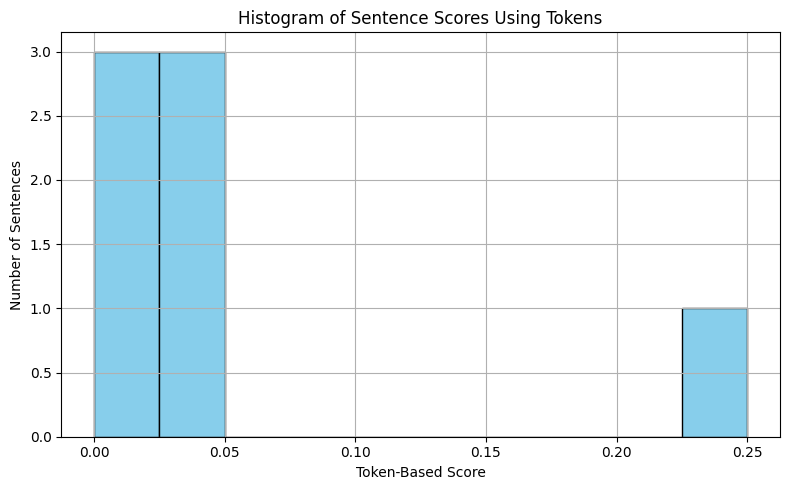

In [7]:
# Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)
# Load the language model
nlp = spacy.load("en_core_web_sm")

# Token scoring function from article.text
def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    total_tokens = len(doc)
    count = sum(1 for token in doc if token.text.lower() in interesting_tokens)
    return count / total_tokens if total_tokens > 0 else 0.0

# Define tokens of interest (use your most common tokens from earlier)
interesting_tokens = ['laser', 'headlight', 'work', 'light', 'car']

# Use spaCy to split sentences properly
doc = nlp(article_text)
sentences = [sent.text.strip() for sent in doc.sents]

# Score each sentence
scores = [score_sentence_by_token(sentence, interesting_tokens) for sentence in sentences]

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(scores, bins=10, edgecolor='black', color='skyblue')
plt.xlabel('Token-Based Score')
plt.ylabel('Number of Sentences')
plt.title('Histogram of Sentence Scores Using Tokens')
plt.grid(True)
plt.tight_layout()
plt.show()

# Most common range of scores: 0.0 to 0.1

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Lemma scores for all sentences:
Sentence 1: 0.025
Sentence 2: 0.04
Sentence 3: 0.25
Sentence 4: 0.07333333333333333
Sentence 5: 0.05405405405405406
Sentence 6: 0.04852320675105485
Sentence 7: 0.041666666666666664


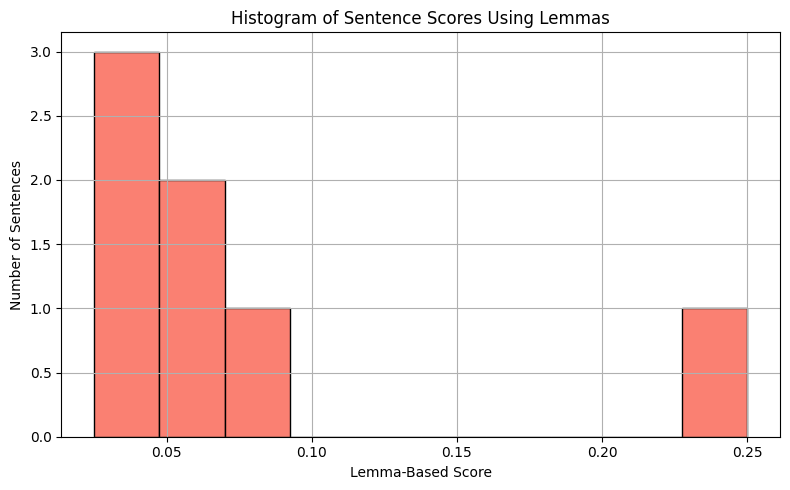

In [15]:
# Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.
# Load the language model
nlp = spacy.load("en_core_web_sm")

# Lemma scoring function
def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    total_tokens = len(doc)
    count = sum(1 for token in doc if token.lemma_.lower() in interesting_lemmas)
    return count / total_tokens if total_tokens > 0 else 0.0

# Define lemmas of interest (use your most common lemmas from earlier)
interesting_lemmas = ['laser', 'headlight', 'work', 'light', 'car']

# Use spaCy to split sentences properly
doc = nlp(article_text)
sentences = [sent.text.strip() for sent in doc.sents]

# Score all sentence by lemma
lemma_scores = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in sentences]
# Print all lemma scores
print('Lemma scores for all sentences:')
for i, score in enumerate(lemma_scores):
    print(f'Sentence {i+1}: {score}')
# Plot histogram of all lemma scores for all sentences
plt.figure(figsize=(8, 5))
plt.hist(lemma_scores, bins=10, edgecolor='black', color='salmon')
plt.xlabel('Lemma-Based Score')
plt.ylabel('Number of Sentences')
plt.title('Histogram of Sentence Scores Using Lemmas')
plt.grid(True)
plt.tight_layout()
plt.show()

# Most common range of scores: 0.0 to 0.1

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

~~~
# Only include nouns
tokens = [token.text.lower() for token in doc if token.pos_ in ["NOUN", "PROPN"] and not token.is_stop and not token.is_punct and not token.is_space]
lemmas = [token.lemma_.lower() for token in doc if token.pos_ in ["NOUN", "PROPN"] and not token.is_stop and not token.is_punct and not token.is_space]
~~~